In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=16)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
from sklearn import metrics

In [16]:
df = pd.read_csv("./data/clean_one_hot_data.csv")
df.drop(df.columns[0], axis=1,inplace=True)

y = df['attrition']
X = df.drop(columns=['attrition'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
logreg = LogisticRegression(max_iter=4000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

In [17]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix)
# from documentation: tn, fp, fn, tp

[305  15  29  19]


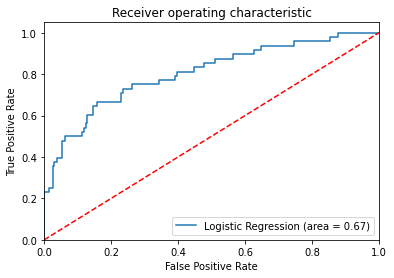

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [35]:
assumed_top_10 = ['age', 'job_satisfaction', 'monthly_income', 'over_time', 'work_life_balance', 'years_since_last_promotion', 
                  'marital_status_single', 'department_sales', 'num_companies_worked', 'job_involvement']

In [36]:
len(assumed_top_10)

10

In [46]:
df = pd.read_csv("./data/clean_one_hot_data.csv")
df.drop(df.columns[0], axis=1,inplace=True)

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit_transform(df)

array([[ 0.4463504 ,  2.28090588, -0.16239918, ..., -0.31409347,
        -0.91892141,  1.45864991],
       [ 1.32236521, -0.4384223 ,  1.71733935, ..., -0.31409347,
         1.08823234, -0.68556546],
       [ 0.008343  ,  2.28090588, -0.16239918, ..., -0.31409347,
        -0.91892141,  1.45864991],
       ...,
       [-1.08667552, -0.4384223 , -0.16239918, ..., -0.31409347,
         1.08823234, -0.68556546],
       [ 1.32236521, -0.4384223 ,  1.71733935, ..., -0.31409347,
         1.08823234, -0.68556546],
       [-0.32016256, -0.4384223 , -0.16239918, ..., -0.31409347,
         1.08823234, -0.68556546]])

In [47]:
y = df['attrition']
X = df[assumed_top_10].values

In [48]:
X.shape

(1470, 10)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
logreg = LogisticRegression(max_iter=4000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

In [50]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [88]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix)
# from documentation: tn, fp, fn, tp

<function confusion_matrix at 0x7f0dc35c6710>


In [74]:
lasso_coeffs = ['daily_rate', 'monthly_income', 'job_satisfaction', 'business_travel', 'years_at_company', 'age']

In [75]:
df = pd.read_csv("./data/clean_one_hot_data.csv")
df.drop(df.columns[0], axis=1,inplace=True)

y = df['attrition']
X = df[lasso_coeffs]

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit_transform(df)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
logreg = LogisticRegression(max_iter=150)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=150)

In [95]:
y_pred = logreg.predict_proba(X_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86957


In [91]:
y_pred_new = pd.Series(y_pred)
cm = confusion_matrix(y_test, y_pred_new).ravel()
print(cm)
# from documentation: tn, fp, fn, tp

[320   0  48   0]


In [79]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [80]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [84]:
print(type(y_pred_new))

<class 'pandas.core.series.Series'>


In [112]:
print(y_pred)

[[0.78165809 0.21834191]
 [0.83391964 0.16608036]
 [0.69467028 0.30532972]
 [0.84745935 0.15254065]
 [0.88358269 0.11641731]
 [0.81367753 0.18632247]
 [0.81253745 0.18746255]
 [0.83324134 0.16675866]
 [0.97786379 0.02213621]
 [0.83393212 0.16606788]
 [0.89452446 0.10547554]
 [0.96069353 0.03930647]
 [0.84341695 0.15658305]
 [0.85377487 0.14622513]
 [0.74558474 0.25441526]
 [0.67539433 0.32460567]
 [0.69424574 0.30575426]
 [0.83569386 0.16430614]
 [0.95539914 0.04460086]
 [0.86457395 0.13542605]
 [0.61793877 0.38206123]
 [0.9055103  0.0944897 ]
 [0.8863323  0.1136677 ]
 [0.79248488 0.20751512]
 [0.76675727 0.23324273]
 [0.99285571 0.00714429]
 [0.73838661 0.26161339]
 [0.76897054 0.23102946]
 [0.84332882 0.15667118]
 [0.80825714 0.19174286]
 [0.82465559 0.17534441]
 [0.87179568 0.12820432]
 [0.73374326 0.26625674]
 [0.89953191 0.10046809]
 [0.78484971 0.21515029]
 [0.9147445  0.0852555 ]
 [0.94695544 0.05304456]
 [0.82883218 0.17116782]
 [0.79778489 0.20221511]
 [0.71053891 0.28946109]


In [98]:
threshold = 0.3
preds = np.where(logreg.predict_proba(X_test)[:,1] > threshold, 1, 0)

In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

df1 = pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

In [101]:
df1

,0
accuracy,0.858696
recall,0.229167
precision,0.423077
roc_auc_score,0.591146


In [102]:
threshold = 0.35
preds = np.where(logreg.predict_proba(X_test)[:,1] > threshold, 1, 0)

df2 = pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

In [103]:
df2

,0
accuracy,0.87500
recall,0.12500
precision,0.60000
roc_auc_score,0.55625


In [104]:
threshold = 0.25
preds = np.where(logreg.predict_proba(X_test)[:,1] > threshold, 1, 0)

df3 = pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

In [105]:
df3

,0
accuracy,0.817935
recall,0.375000
precision,0.327273
roc_auc_score,0.629688


In [106]:
threshold = 0.20
preds = np.where(logreg.predict_proba(X_test)[:,1] > threshold, 1, 0)

df4 = pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

In [107]:
df4

,0
accuracy,0.733696
recall,0.583333
precision,0.264151
roc_auc_score,0.669792


In [108]:
threshold = 0.15
preds = np.where(logreg.predict_proba(X_test)[:,1] > threshold, 1, 0)

df5 = pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

In [109]:
df5

,0
accuracy,0.543478
recall,0.750000
precision,0.187500
roc_auc_score,0.631250


In [110]:
threshold = 0.10
preds = np.where(logreg.predict_proba(X_test)[:,1] > threshold, 1, 0)

df6 = pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

In [111]:
df6

,0
accuracy,0.385870
recall,0.854167
precision,0.157692
roc_auc_score,0.584896
